
# 作業: 
    
    (1)以, Adam, 為例, 調整 batch_size, epoch , 觀察accurancy, loss 的變化
    
    (2)以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy

In [1]:
import keras
#from keras.datasets import cifar10
from keras.datasets import mnist 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy 
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
def model_builder():    
    #    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
    model = Sequential()
    #   第二步：構建網絡層
    model.add(Dense( 32,input_shape=(784,))) # 輸入層，28*28=784   
    model.add(Activation('relu')) # 激活函數是relu   

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 32)) # 隱藏層節點32個   
    model.add(Activation('relu'))  

    model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
    model.add(Activation('softmax')) # 最後一層用softmax作為激活函數
    
    # 模型建立完成後，統計參數總量
    # 輸出模型摘要資訊
    print("Total Parameters：%d" % model.count_params())
    ## print(model.summary())
    return model

In [3]:
#  第四步：資料分割
# 使用Keras自帶的mnist工具讀取數據（第一次需要聯網）
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [4]:
print(f"X_train shape = {X_train.shape}, X_test shape={X_test.shape}")
print(f"y_train shape = {y_train.shape}, y_test shape={y_test.shape}")

X_train shape = (60000, 28, 28), X_test shape=(10000, 28, 28)
y_train shape = (60000,), y_test shape=(10000,)


In [5]:
# 由於mnist的輸入數據維度是(num, 28 , 28)，這裡需要把後面的維度直接拼起來變成784維   
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])  

### 先不取用  改用 to_categorical 將 y 資料轉為 one hot 型態
# Y_train = (numpy.arange(10) == y_train[:, None]).astype(int)
# Y_test = (numpy.arange(10) == y_test[:, None]).astype(int)

from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [6]:
 '''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


'\nRMSprop- Arguments\nlr: float >= 0. Learning rate.\nrho: float >= 0.\nepsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().\ndecay: float >= 0. Learning rate decay over each update.\n'

In [7]:
def plot_loss_acc(history_dict, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(loss_values) + 1)

    ax1.plot(epochs, loss_values, 'k:', label='training loss')
    ax1.plot(epochs, val_loss_values, 'b--', label='validation loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.set_title(title)

    ax2.plot(epochs, acc_values, 'k:', label='training accuracy')
    ax2.plot(epochs, val_acc_values, 'b--', label='validation accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.set_title(title)
    plt.tight_layout()
    plt.show()

### 調整batch size, epoch

------ optimizer=adam, batch_size=256, epochs=20------
Instructions for updating:
Colocations handled automatically by placer.
Total Parameters：28618
Instructions for updating:
Use tf.cast instead.


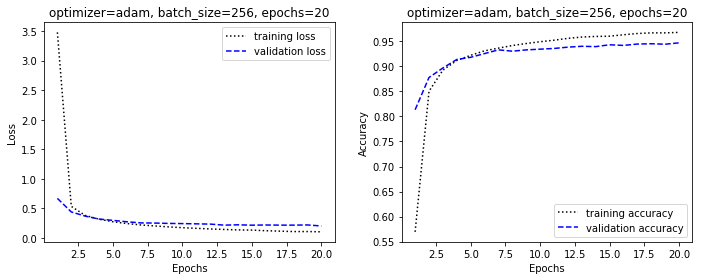

------ optimizer=adam, batch_size=256, epochs=30------
Total Parameters：28618


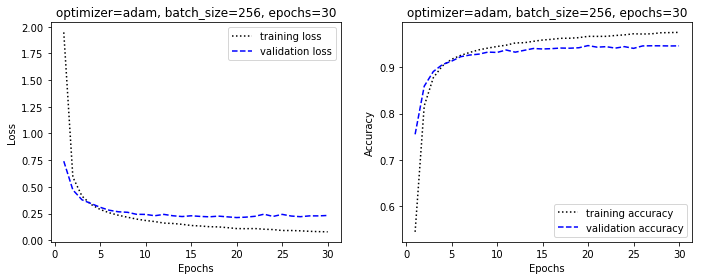

------ optimizer=adam, batch_size=512, epochs=20------
Total Parameters：28618


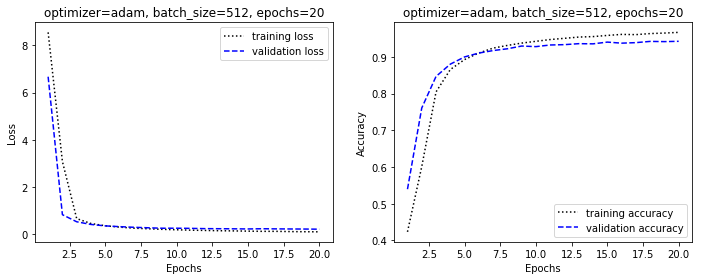

------ optimizer=adam, batch_size=512, epochs=30------
Total Parameters：28618


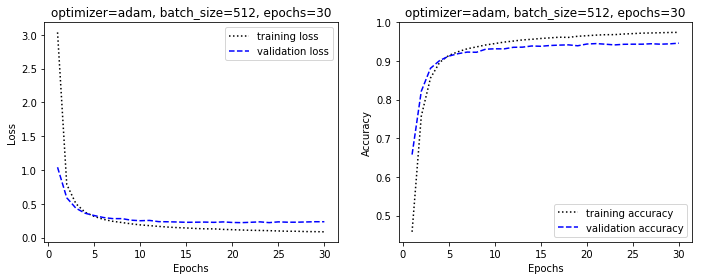

In [8]:
# 第三步：編譯
for optimizer in ['adam']:
    for batch_size in [256, 512]:
        for epochs in [20, 30]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"------ {title}------")
            
            model = model_builder()
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)

### 分別驗證 SGD, Adam, Rmsprop 的 accuracy

... optimizer=adam, batch_size=512, epochs=20
Total Parameters：28618


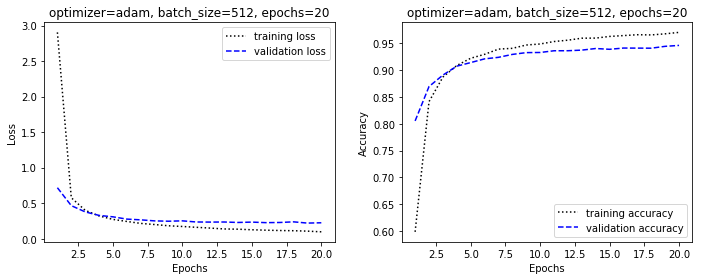

... optimizer=sgd, batch_size=512, epochs=20
Total Parameters：28618


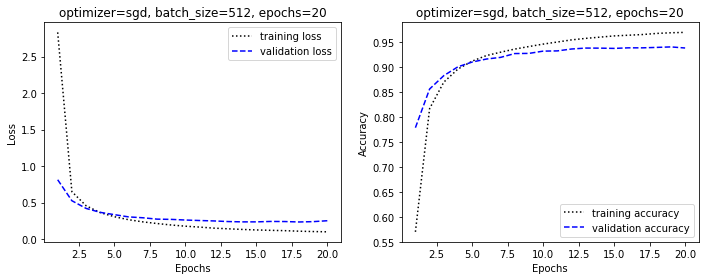

... optimizer=rmsprop, batch_size=512, epochs=20
Total Parameters：28618


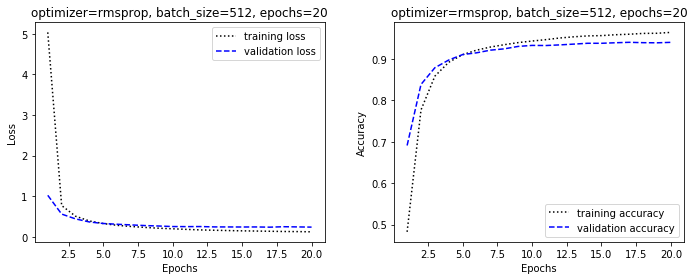

In [9]:
# 第三步：編譯
for optimizer in ['adam', 'sgd', 'rmsprop']:
    for batch_size in [512]:
        for epochs in [20]:
            title = f"optimizer={optimizer}, batch_size={batch_size}, epochs={epochs}"
            print(f"... {title}")
            
            model = model_builder()
            model.compile(optimizer='adam',
                          loss = 'categorical_crossentropy',
                          metrics = ['accuracy'])

            history = model.fit(X_train, Y_train,
                                batch_size=batch_size,
                                epochs=epochs, 
                                verbose=0,
                                validation_split=0.25)

            
            plot_loss_acc(history.history, title=title)

In [10]:
#    第六步：輸出
model = model_builder()
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, Y_train,
        batch_size=128,
        epochs=8, 
        verbose=0)

evaluation = model.evaluate(X_test, Y_test)

print(f"loss = {evaluation[0]:.3f}, accuracy={evaluation[1]:.3f}")

Total Parameters：28618
10000/10000 [==============================] - 0s 41us/step
loss = 0.183, accuracy=0.950
